### libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data extraction from the csv file:


In [2]:
df = pd.read_csv('DistMod.csv')
zcmb = df['zcmb']
mb = df['mb'] #apparent magnitude
dmb = df['dmb'] #apparent magnitude error

### input values 

In [3]:
H0 = 70
q0 = 0 
M = -19.27

### define curve

In [4]:
def curve(q0, H0, z):
    m = M + 43.23-(5*np.log10(H0 / 68)) + 5*np.log10(z) + 1.086*(1-q0)*z
    return m

### scatter plot:

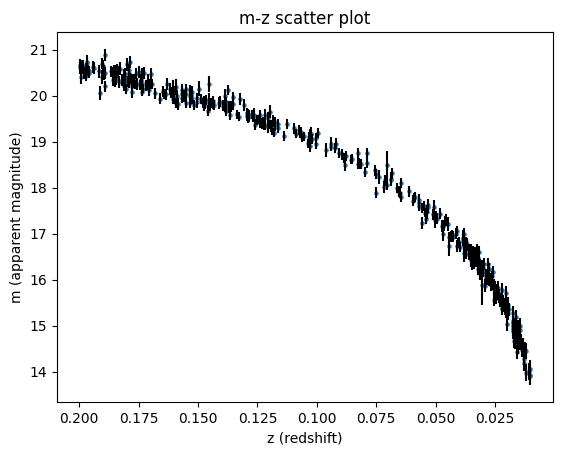

In [38]:
plt.scatter(zcmb , mb , s = 5)
plt.title("m-z scatter plot")
plt.ylabel("m (apparent magnitude)")
plt.xlabel("z (redshift)")
plt.gca().invert_xaxis()
plt.errorbar(zcmb, mb,yerr = dmb, fmt='none',ecolor = 'black',color='yellow') 
plt.show()

fit 1:
H0 = 0
q0 = 0

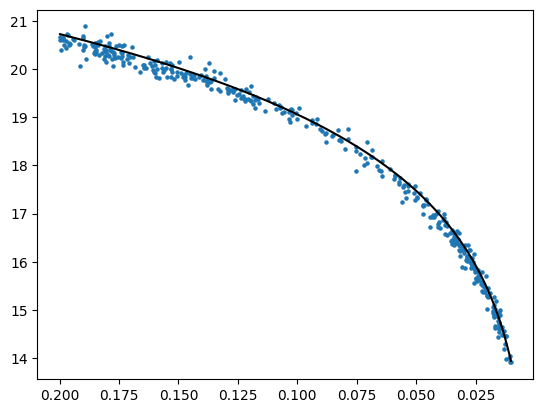

In [39]:
q0 = -0.5
H0 = 70
plt.scatter(zcmb , mb , s = 5)
x_curve = zcmb
y_curve = curve(q0,H0,zcmb)
plt.gca().invert_xaxis()
plt.plot(x_curve,y_curve,color = 'black')
plt.show()

# A)
### with trial and error we can find out that:
## -1<q0<1

and 

## 65<H0<75

### penalty function

In [5]:
def penalty(m , z , H0, q0, dm):
    chi = (m - curve(q0 , H0, z))/dm
    return (chi)**2

## phase space

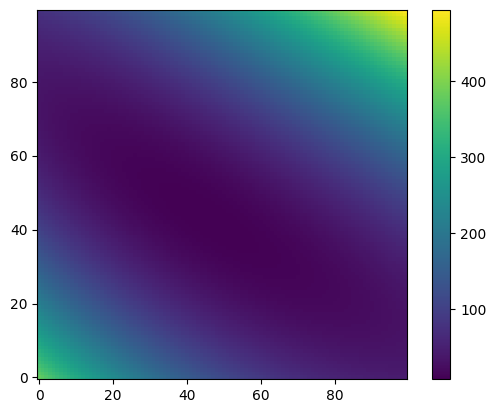

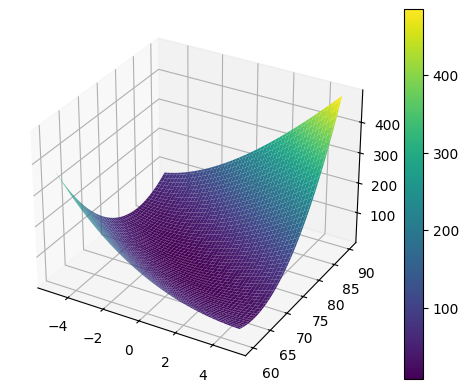

In [41]:
# Create x and y values
q0_ax = np.linspace(-5, 5, 100)
H0_ax = np.linspace(60, 90, 100)

chi2_array = np.empty((100,100))
for i in range(0 ,100):
   for j in range(0 ,100):
        q = q0_ax[i]
        h = H0_ax[j]
        total = 0
        for k in range(0,len(mb)):
            total += penalty(mb[k],zcmb[k],h,q,dmb[k])
        chi2_array[i][j] = total

plt.imshow(chi2_array , origin = 'lower')
plt.colorbar()
plt.show()


X, Y = np.meshgrid(q0_ax, H0_ax)
Z = chi2_array
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf)
plt.show()



# MCMC:

25.086000000000002


Text(0, 0.5, 'q0')

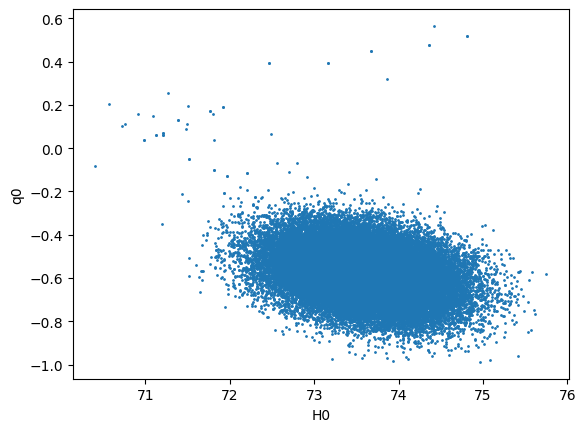

In [8]:
import random
#find random starting point in phase space 
point_q = np.random.uniform(-2, 2)
point_h = np.random.uniform(60,80)
start = (point_q , point_h)

nmcmc = 50000
q_sigma = 0.08
h_sigma = 0.45

#point1:
chi2_1 = 0
for k in range(0,len(mb)):
    chi2_1 += penalty(mb[k],zcmb[k],point_h,point_q,dmb[k])

w_list = []
chi2_1_list  = []
point_q_list = []
point_h_list = []
acceptance = 0 
w = 1
for i in range(0,nmcmc):
    
    q_step = np.random.normal(loc=0 , scale=q_sigma)
    h_step = np.random.normal(loc=0 , scale=h_sigma)
    
    new_q = point_q + q_step
    new_h = point_h + h_step
    
    chi2_2 = 0
    for k in range(0,len(mb)):
        chi2_2 += penalty(mb[k],zcmb[k],new_h,new_q,dmb[k])

    r = random.random()
    
    chi2_1_list.append(chi2_2)
    point_q_list.append(new_q)
    point_h_list.append(new_h)

    if r < np.exp(chi2_1 - chi2_2):
            chi2_1_list.append(chi2_2)
            chi2_1 = chi2_2
            point_q_list.append(new_q)
            point_q = new_q
            point_h_list.append(new_h)
            point_h = new_h
            
            acceptance += 1
            w_list.append(w)
            w=1
    else:
         w += 1
         pass
acceptance_rate = acceptance/nmcmc
print(acceptance_rate*100 )

plt.scatter(point_h_list,point_q_list, s = 1)
plt.xlabel("H0")
plt.ylabel("q0")
